# Prelim Work on Weather Classification/Prediction (New)

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weather_prediction_dataset.csv')

df.shape

(3654, 165)

The weather prediction dataset (https://www.kaggle.com/datasets/thedevastator/weather-prediction) contains weather data collected from 18 different locations in Europe everyday from 2000 to 2010.

### Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


There are 3654 entries in the dataset with 165 columns. There is a large number of columns because the dataset has data from all 18 weather stations. There are only numberical features in this dataset.

Most cities have the same features (i.e. mean temperature) but some cities lack certain features, such as hours of sunshine in Malmo. According to metadata.txt of the dataset:

"""

While all selected locations provide data for the variables ‘mean temperature’, ‘max temperature’, and ‘min temperature’, we also included data for the variables 'cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine' wherever those were available.

After collecting the data, very basic cleaning of the data was performed.

...

[Units for measuring each weather feature is as follows.]

CC   : cloud cover in oktas

DD   : wind direction in degrees

FG   : wind speed in 1 m/s

FX   : wind gust in 1 m/s

HU   : humidity in fraction of 100 %

PP   : sea level pressure in 1000 hPa

QQ   : global radiation in 100 W/m2

RR   : precipitation amount in 10 mm

SS   : sunshine in 1 Hours

TG   : mean temperature in 1 &#176;C

TN   : minimum temperature in 1 &#176;C

TX   : maximum temperature in 1 &#176;C

"""

In [5]:
df.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6


In [6]:
df.tail(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9
3653,20100101,1,8,0.93,0.9965,0.08,0.56,0.0,2.9,-0.2,...,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.00,0.5,-0.7,1.8


##### For project purposes, we will only look at data from Basel, Switzerland.

To see data just from the city of Basel...

In [7]:
# Source: ChatGPT
# Prompt: I am working on a new weather prediction dataset. It has data collected from 18 weather stations. 
# Each column is labeled with which city/station the data came from, i.e. BASEL_sunshine for sunshine hours recorded in Basel. 
# Given dataframe df that stores the dataset, generate dataframe basel that has only data from basel.

# Select BASEL columns plus 'date' and 'time'
basel = df.loc[:, df.columns.str.startswith('BASEL_') | df.columns.isin(['DATE', 'MONTH'])]

# Remove 'BASEL_' prefix from relevant columns
basel.columns = [col.replace('BASEL_', '') if col.startswith('BASEL_') else col for col in basel.columns]

basel.head()

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [8]:
basel['precipitation'].describe()

count    3654.000000
mean        0.234849
std         0.536267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.210000
max         7.570000
Name: precipitation, dtype: float64

Precipitation is a useful target we can try to learn via classification, regression, or prediction. It will help people plan and prepare for possible rain and even flash floods.

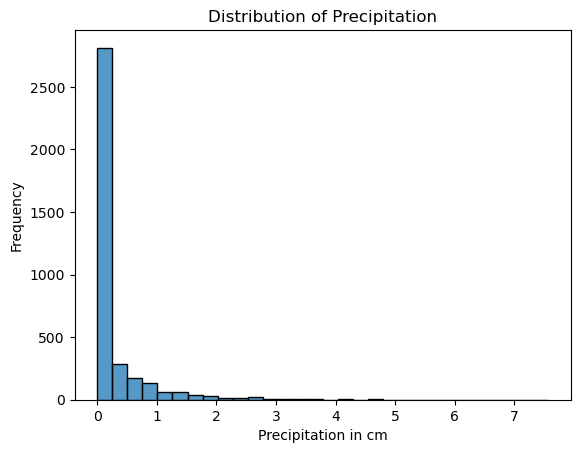

In [9]:
# Source: ChatGPT
# Prompt: Create a distribution plot for the column

sns.histplot(basel['precipitation'], bins=30)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation in cm')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Check for missing values in the dataset
print(df.isnull().sum().sum())

0


There are no missing values in the dataset.

In [11]:
print(basel.describe())

               DATE        MONTH  cloud_cover     humidity     pressure  \
count  3.654000e+03  3654.000000  3654.000000  3654.000000  3654.000000   
mean   2.004568e+07     6.520799     5.418446     0.745107     1.017876   
std    2.874287e+04     3.450083     2.325497     0.107788     0.007962   
min    2.000010e+07     1.000000     0.000000     0.380000     0.985600   
25%    2.002070e+07     4.000000     4.000000     0.670000     1.013300   
50%    2.004567e+07     7.000000     6.000000     0.760000     1.017700   
75%    2.007070e+07    10.000000     7.000000     0.830000     1.022700   
max    2.010010e+07    12.000000     8.000000     0.980000     1.040800   

       global_radiation  precipitation     sunshine    temp_mean     temp_min  \
count       3654.000000    3654.000000  3654.000000  3654.000000  3654.000000   
mean           1.330380       0.234849     4.661193    11.022797     6.989135   
std            0.935348       0.536267     4.330112     7.414754     6.653356   


In [12]:
# Source: ChatGPT
# Prompt: I want to see the max precipitation values for all cities

# Filter columns that contain 'precipitation'
precip_cols = [col for col in df.columns if 'precipitation' in col.lower()]

# Create a DataFrame with just those columns
precip_data = df[precip_cols]

# Extract city names by removing the '_precipitation' part
city_names = [col.split('_')[0] for col in precip_cols]

# Get max precipitation values for each city
max_precip = precip_data.max()
max_precip.index = city_names  # Rename the index to just the city

# Display result
print(max_precip.sort_values(ascending=False))

PERPIGNAN     16.04
DRESDEN       15.80
MONTELIMAR    15.40
MUENCHEN       9.79
LJUBLJANA      8.64
MALMO          7.69
BASEL          7.57
BUDAPEST       6.96
TOURS          6.20
SONNBLICK      5.95
MAASTRICHT     5.87
DUSSELDORF     5.74
OSLO           5.60
KASSEL         5.42
STOCKHOLM      4.30
DE             4.25
HEATHROW       3.66
dtype: float64


The max precipitation recorded in this dataset is 16.04 cm from Perpignan and Tours (France). The max precipitation recorded in Basel is 7.57 cm.

In [13]:
basel.sort_values(by='precipitation', ascending=False).head()

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
2776,20070808,8,8,0.89,1.0136,0.59,7.57,0.0,14.9,13.8,17.0
3178,20080913,9,8,0.93,1.0136,0.18,7.11,0.0,13.0,11.8,13.5
2451,20060917,9,8,0.92,1.0103,0.17,5.78,0.0,16.4,15.5,17.3
2254,20060304,3,8,0.94,0.9992,0.23,5.36,0.0,0.2,-1.6,4.8
3114,20080711,7,4,0.73,1.0112,2.38,4.77,8.5,21.1,17.4,28.5


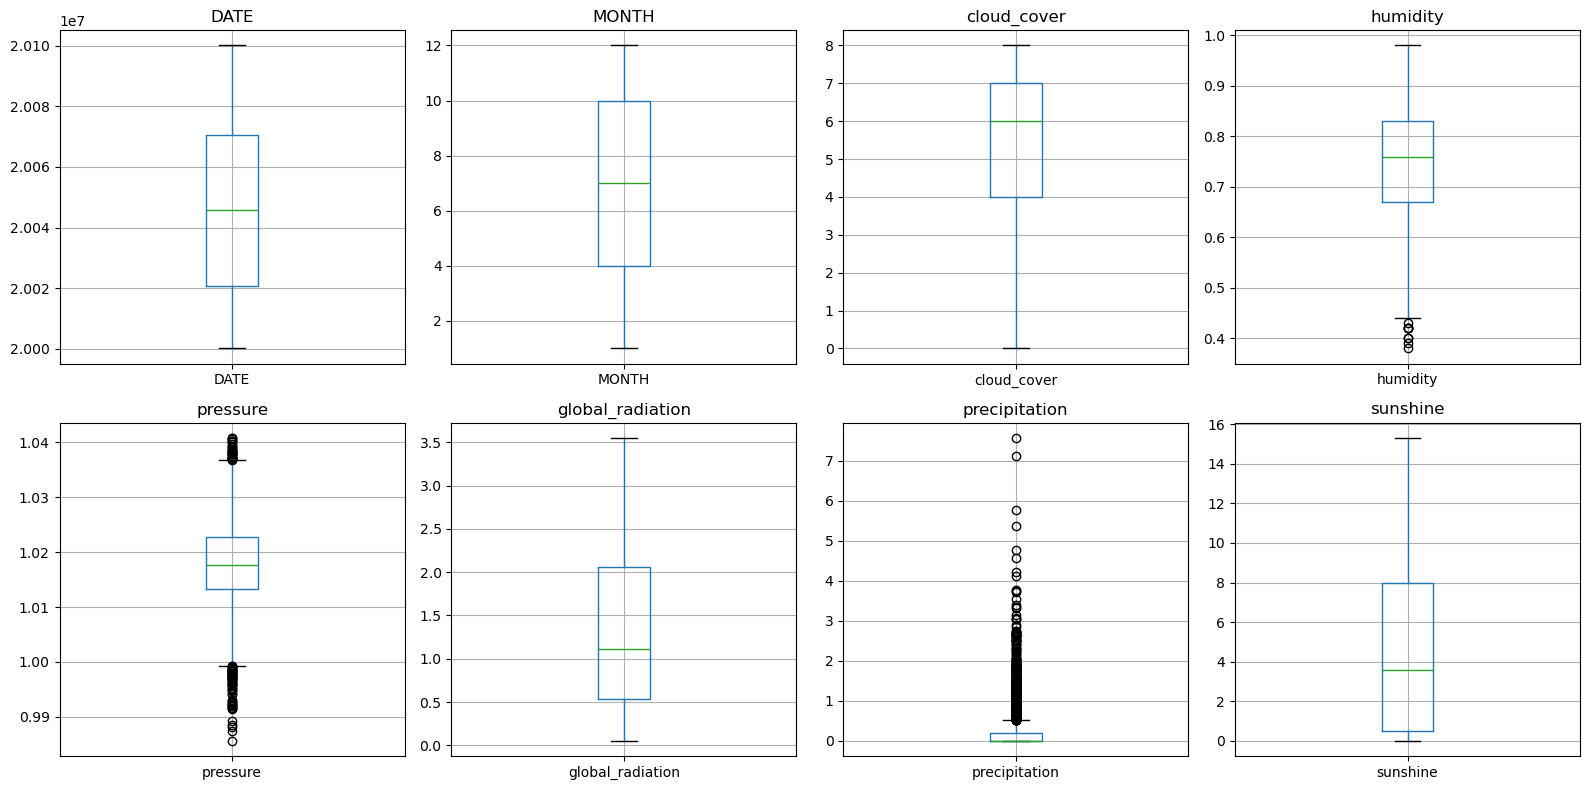

In [14]:
#Boxplots of all numeric features in the dataset

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  # Adjust rows/cols as needed
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(basel.columns):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        basel.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(basel.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean (or median) of the target variable
mean_value = basel['precipitation'].mean()  # For baseline regression

# Predict the mean for all entries
baseline_predictions = [mean_value] * len(basel)

# Calculate regression metrics
mae = mean_absolute_error(basel['precipitation'], baseline_predictions)
mse = mean_squared_error(basel['precipitation'], baseline_predictions)
r2 = r2_score(basel['precipitation'], baseline_predictions)

print(f"Baseline Mean: {mean_value:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Baseline Mean: 0.23
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.29
R² Score: 0.00


The baseline MAE and MSE sets a standard for our classification models. If our model error is below the baseline, it is not a good model and is worse than simply predicting the mean.